In [1]:
import matplotlib
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 20})



In [2]:
filename = "../../results_aggr/app_history_vm.csv"
insertsFigure = "appHistoryVmInserts.pdf"
queries1Figure = "appHistoryVmQueries.pdf"
queries2Figure = "appHistoryVmGroup.pdf"


In [3]:
df_latencies = pd.read_csv(filename)
df_latencies.sort_values(by=["number"], inplace=True)



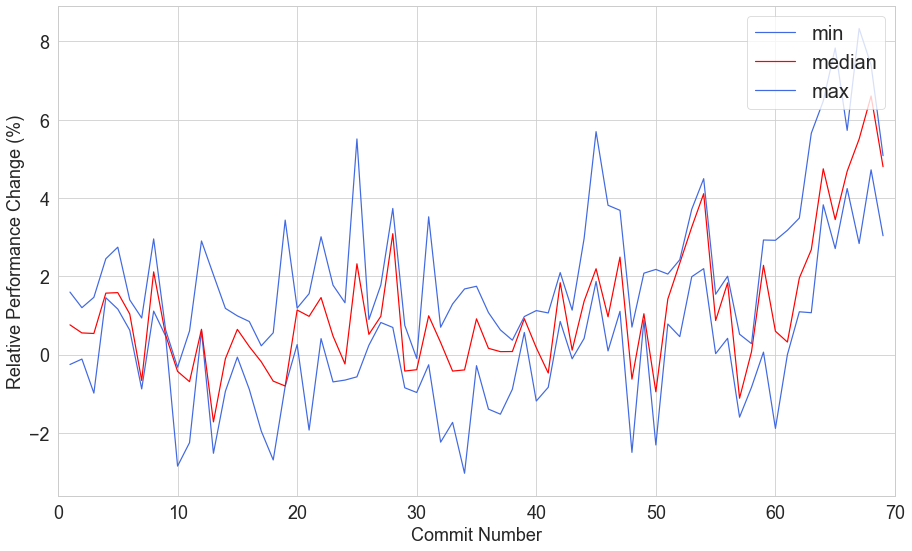

In [4]:
grouped_df = df_latencies.drop(columns={"diffQueries1","diffQueries2"}).groupby("number").agg({'diffInserts': ['min', 'median', 'max']})
fig, ax = plt.subplots(figsize=(15,9))
grouped_df.diffInserts.plot(y = "min", ax=ax, color="royalblue")
grouped_df.diffInserts.plot(y = "median", ax=ax, color="red")
grouped_df.diffInserts.plot(y = "max", ax=ax, color="royalblue",
                            xticks=[0,10,20,30,40,50,60,70],
                            xlim=[0,70],
                            fontsize=18)
ax.legend(loc=1, fontsize="medium")
plt.xlabel('Commit Number', fontsize=18)
plt.ylabel('Relative Performance Change (%)', fontsize=18)
fig.savefig(insertsFigure, bbox_inches='tight')

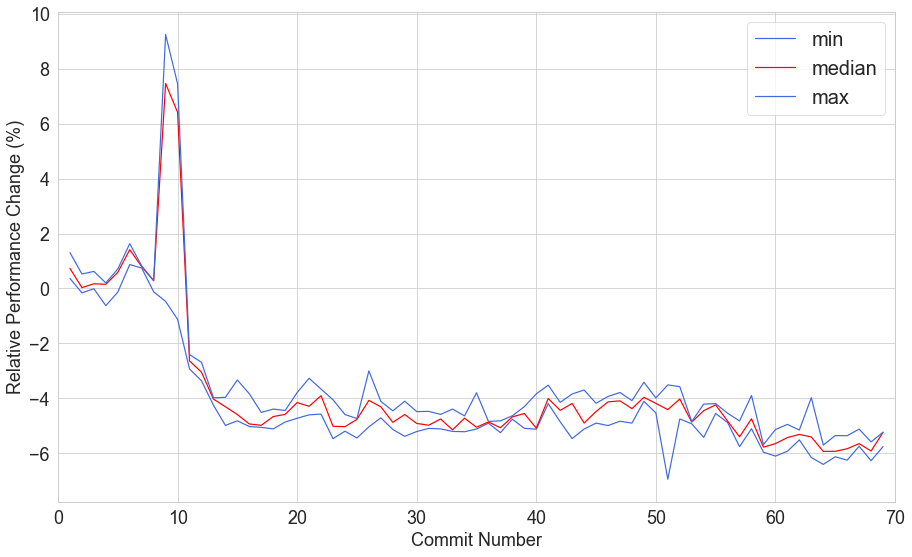

In [5]:
grouped_df = df_latencies.drop(columns={"diffInserts","diffQueries2"}).groupby("number").agg({'diffQueries1': ['min', 'median', 'max']})
fig, ax = plt.subplots(figsize=(15,9))
grouped_df.diffQueries1.plot(y = "min", ax=ax, color="royalblue")
grouped_df.diffQueries1.plot(y = "median", ax=ax, color="red")
grouped_df.diffQueries1.plot(y = "max", ax=ax, color="royalblue",
                            xticks=[0,10,20,30,40,50,60,70],
                            xlim=[0,70],
                            fontsize=18)
ax.legend(loc=1, fontsize="medium")
plt.xlabel('Commit Number', fontsize=18)
plt.ylabel('Relative Performance Change (%)', fontsize=18)
fig.savefig(queries1Figure, bbox_inches='tight')

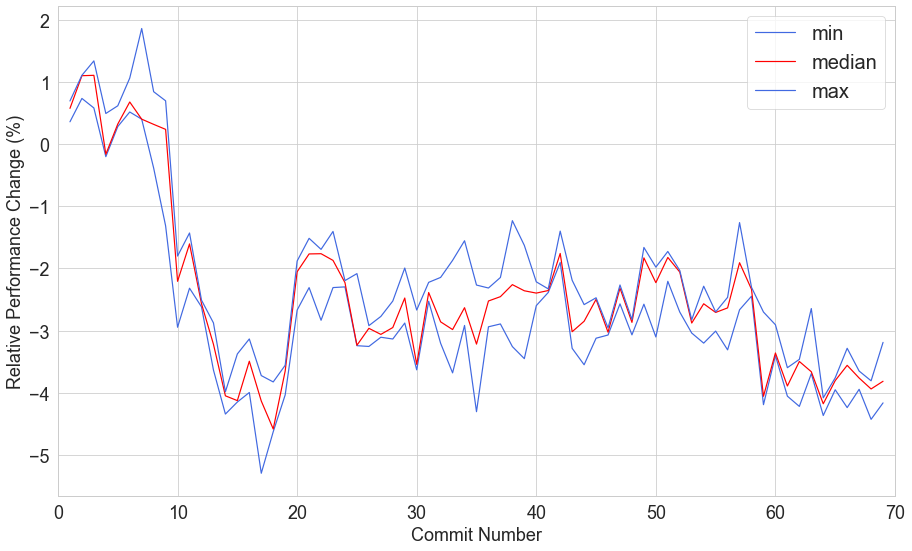

In [6]:
grouped_df = df_latencies.drop(columns={"diffInserts","diffQueries1"}).groupby("number").agg({'diffQueries2': ['min', 'median', 'max']})
fig, ax = plt.subplots(figsize=(15,9))
grouped_df.diffQueries2.plot(y = "min", ax=ax, color="royalblue")
grouped_df.diffQueries2.plot(y = "median", ax=ax, color="red")
grouped_df.diffQueries2.plot(y = "max", ax=ax, color="royalblue",
                             xticks=[0,10,20,30,40,50,60,70],
                            xlim=[0,70],
                            fontsize=18)
ax.legend(loc=1, fontsize="medium")
plt.xlabel('Commit Number', fontsize=18)
plt.ylabel('Relative Performance Change (%)', fontsize=18)
fig.savefig(queries2Figure, bbox_inches='tight')
